In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [81]:
era5_train = pd.read_csv("train.csv", sep=",")
era5_test = pd.read_csv("test.csv", sep=",")

In [82]:
era5_train.head()

,id,valid_time,latitude,longitude,tp,u10,v10,sp,u100,v100,tcc,ptype,t2m
0,1,2018-01-01 00:00:00,59.0,-8.00,0.000004,1.405868,-1.367767,98134.81,1.516388,-1.468002,0.968842,1.0,279.75903
1,2,2018-01-01 00:00:00,59.0,-7.75,0.000017,2.151962,-1.555267,98086.81,2.239044,-1.634994,0.978790,1.0,279.61255
2,3,2018-01-01 00:00:00,59.0,-7.50,0.000018,2.691025,-1.585541,98078.81,2.783966,-1.686752,0.975586,1.0,279.71997
3,4,2018-01-01 00:00:00,59.0,-7.25,0.000019,2.850204,-1.714447,98076.81,2.971466,-1.854721,0.978790,1.0,279.78247
4,5,2018-01-01 00:00:00,59.0,-7.00,0.000015,3.299423,-1.867767,98084.81,3.455841,-2.001205,0.968842,1.0,279.86646


In [83]:
print(era5_train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13288920 entries, 0 to 13288919
Data columns (total 13 columns):
 #   Column      Dtype  
---  ------      -----  
 0   id          int64  
 1   valid_time  object 
 2   latitude    float64
 3   longitude   float64
 4   tp          float64
 5   u10         float64
 6   v10         float64
 7   sp          float64
 8   u100        float64
 9   v100        float64
 10  tcc         float64
 11  ptype       float64
 12  t2m         float64
dtypes: float64(11), int64(1), object(1)
memory usage: 1.3+ GB
None


In [84]:
print(era5_train.isin([np.nan]).sum())

id            0
valid_time    0
latitude      0
longitude     0
tp            0
u10           0
v10           0
sp            0
u100          0
v100          0
tcc           0
ptype         0
t2m           0
dtype: int64


In [85]:
def cleanTime(data):
    year = []
    month = []
    day = []
    hour = []
    
    col = data["valid_time"]
    
    for i in range (0, len(col)):
        year.append(col[i][0:4])
        month.append(col[i][5:7])
        day.append(col[i][8:10])
        hour.append(col[i][11:13])
        
    data["year"] = list(map(int, year))
    data["month"] = list(map(int, month))
    data["day"] = list(map(int, day))
    data["hour"] = list(map(int, hour))
    
    data = data.drop("valid_time", axis=1)
    
    return data

era5_train = cleanTime(era5_train)

In [86]:
era5_train.head()

,id,latitude,longitude,tp,u10,v10,sp,u100,v100,tcc,ptype,t2m,year,month,day,hour
0,1,59.0,-8.00,0.000004,1.405868,-1.367767,98134.81,1.516388,-1.468002,0.968842,1.0,279.75903,2018,1,1,0
1,2,59.0,-7.75,0.000017,2.151962,-1.555267,98086.81,2.239044,-1.634994,0.978790,1.0,279.61255,2018,1,1,0
2,3,59.0,-7.50,0.000018,2.691025,-1.585541,98078.81,2.783966,-1.686752,0.975586,1.0,279.71997,2018,1,1,0
3,4,59.0,-7.25,0.000019,2.850204,-1.714447,98076.81,2.971466,-1.854721,0.978790,1.0,279.78247,2018,1,1,0
4,5,59.0,-7.00,0.000015,3.299423,-1.867767,98084.81,3.455841,-2.001205,0.968842,1.0,279.86646,2018,1,1,0


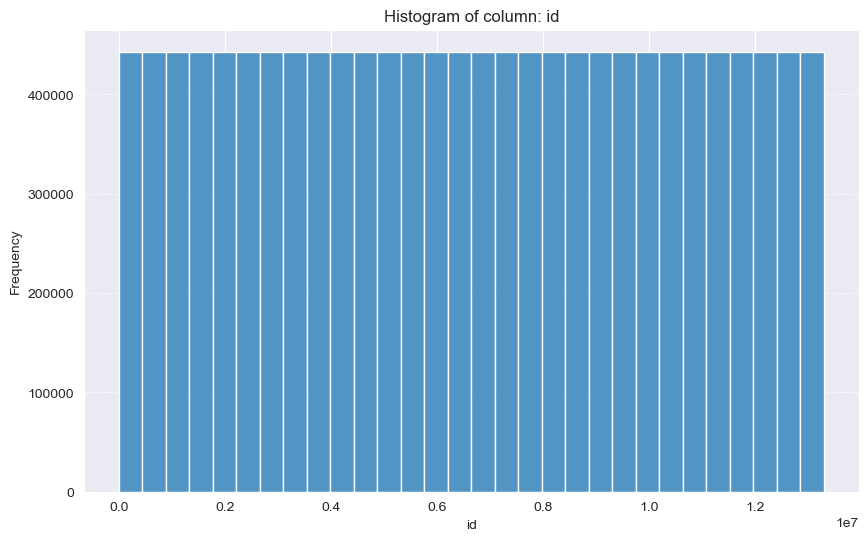

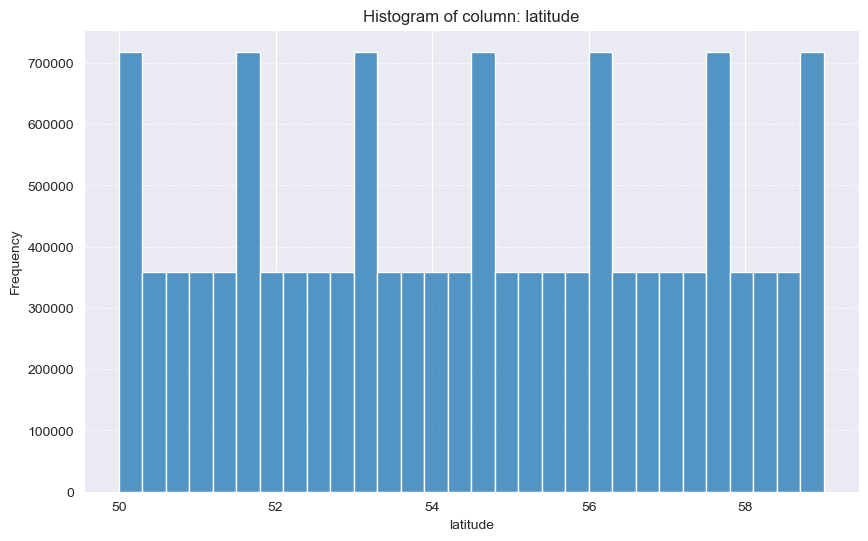

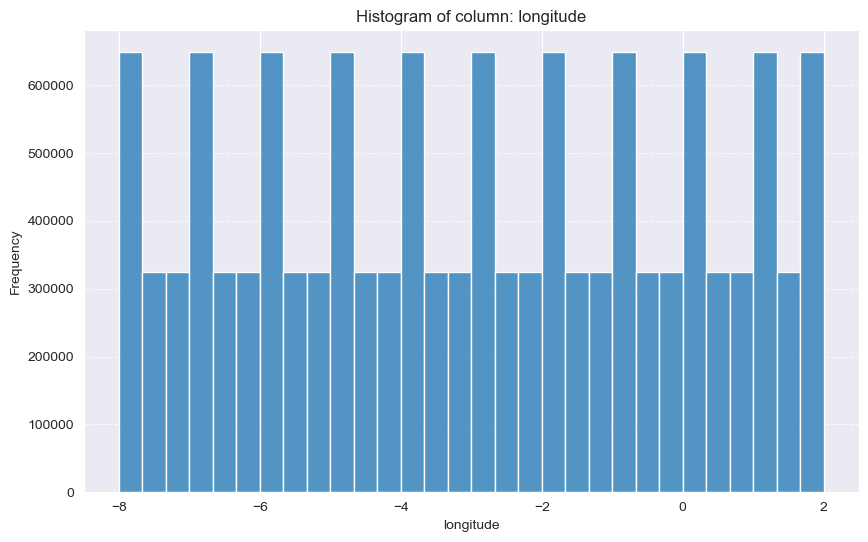

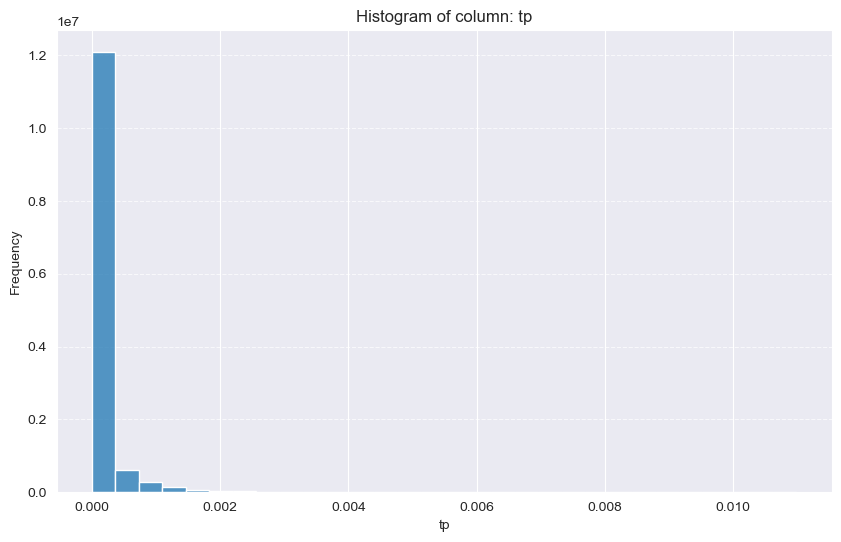

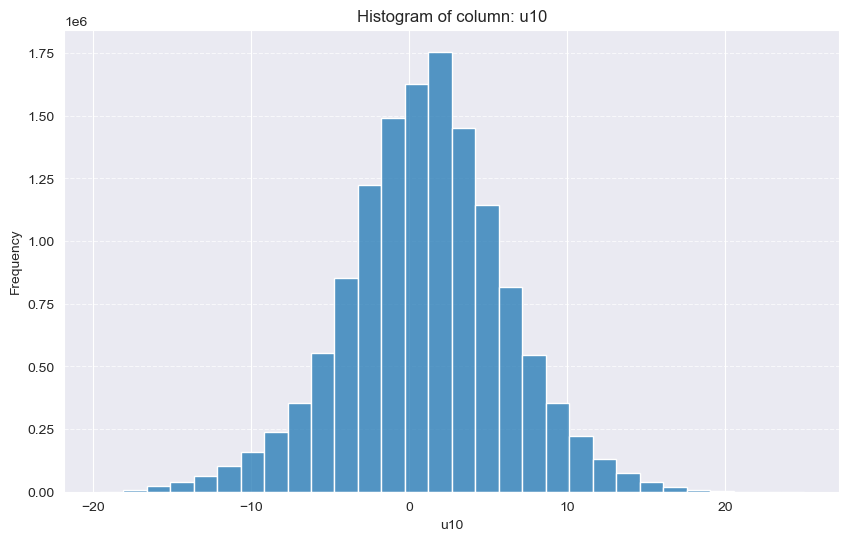

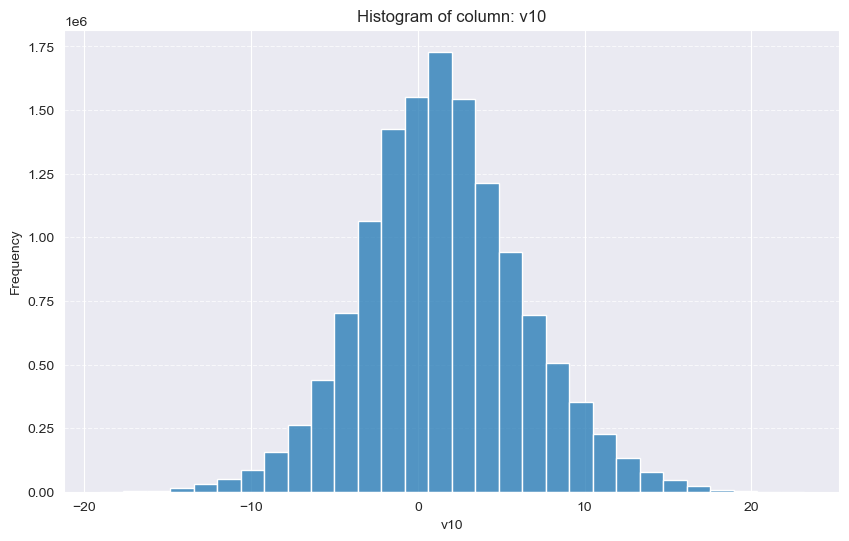

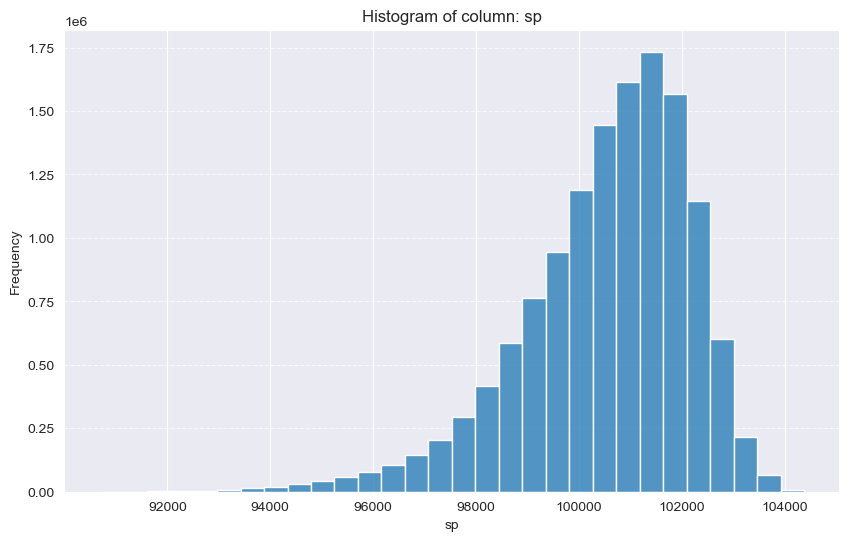

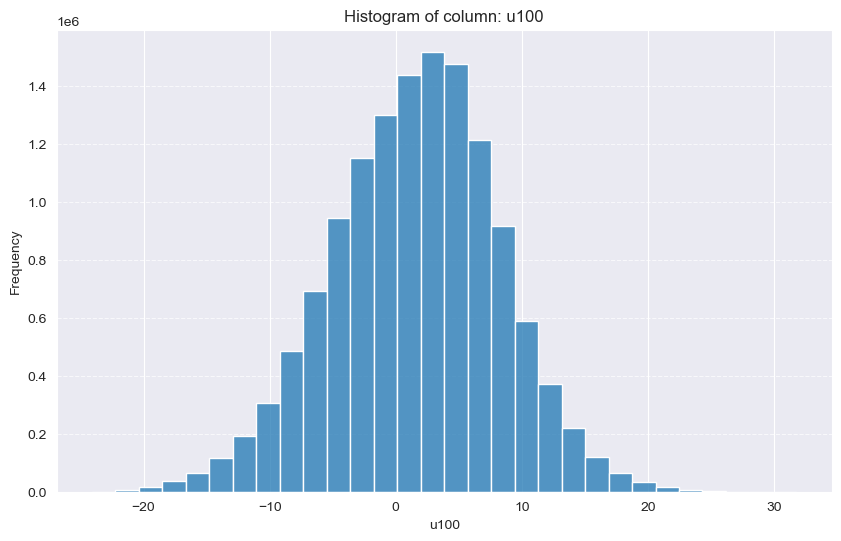

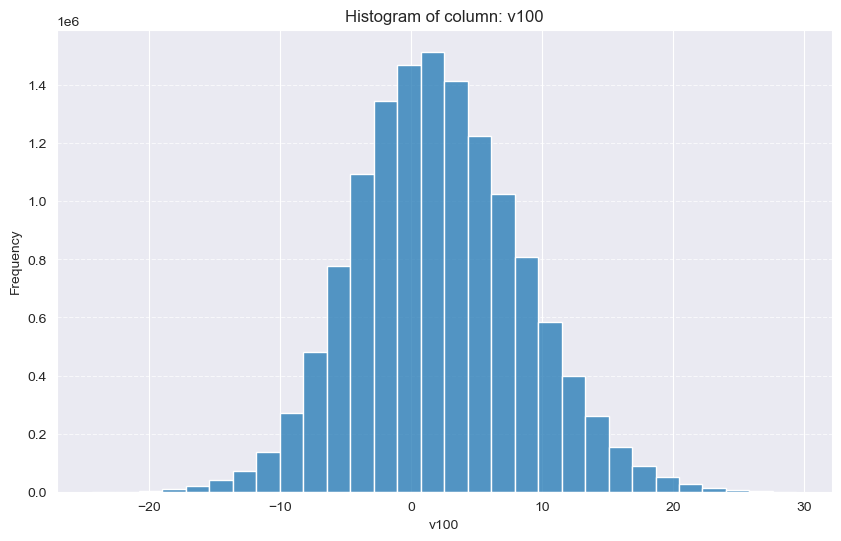

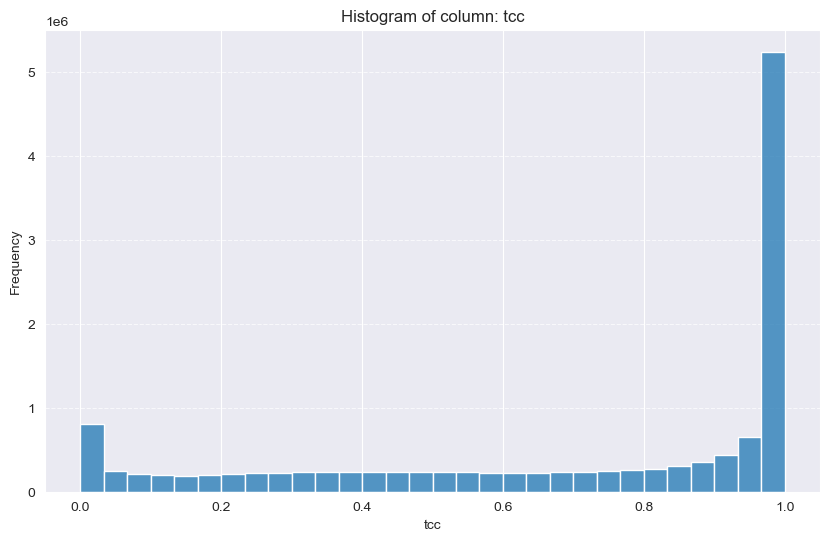

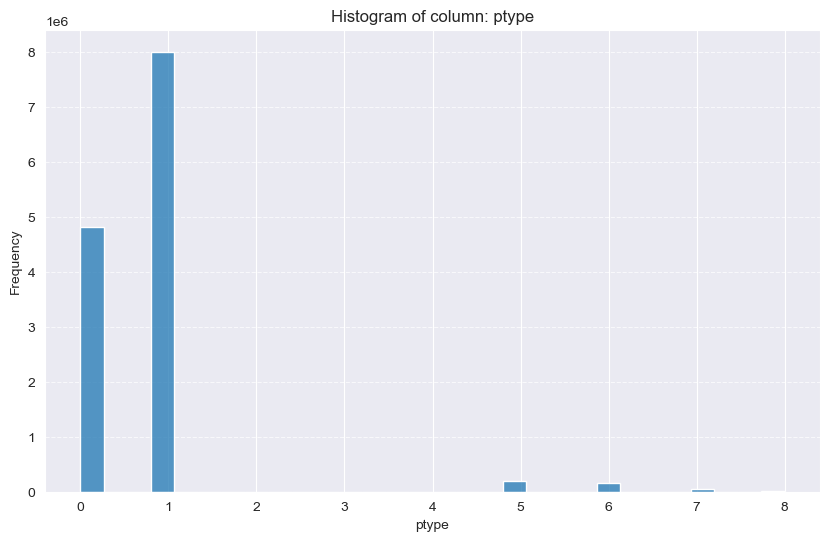

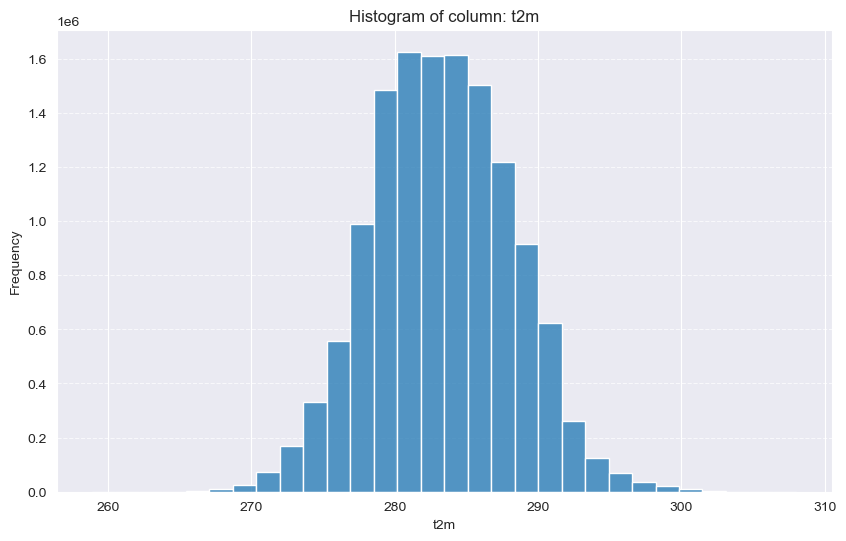

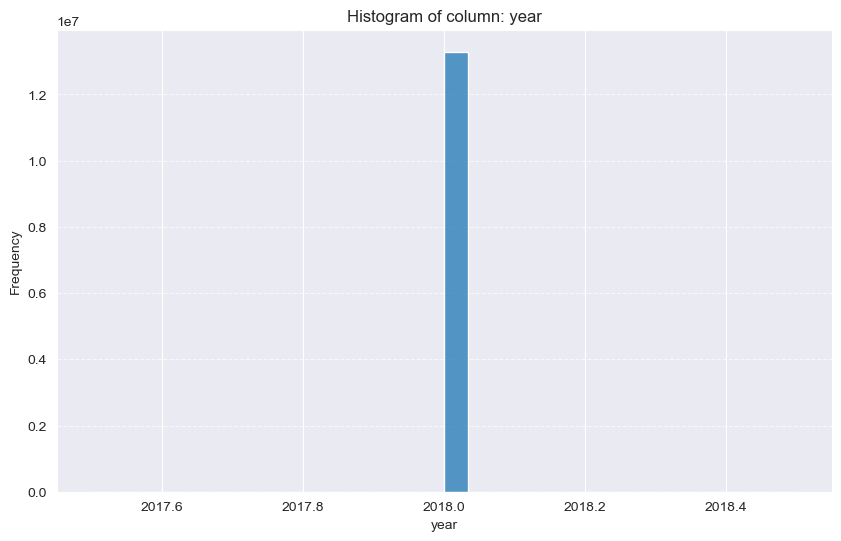

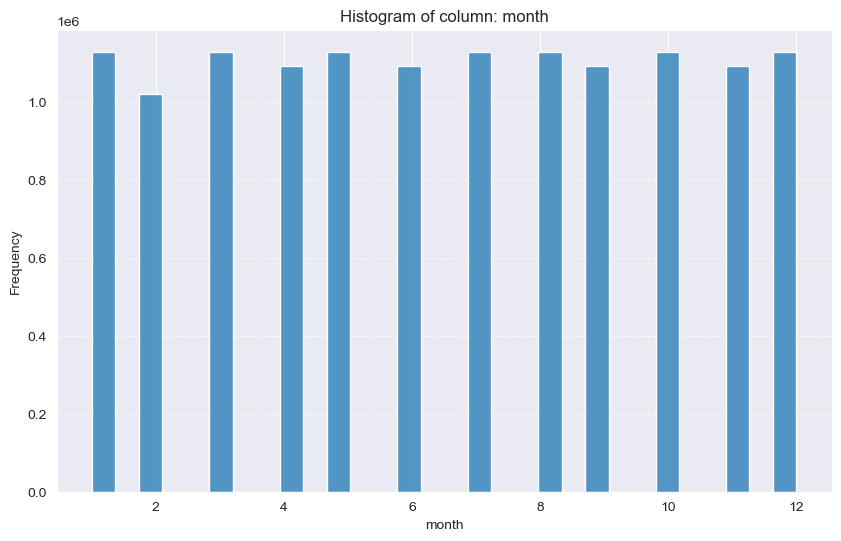

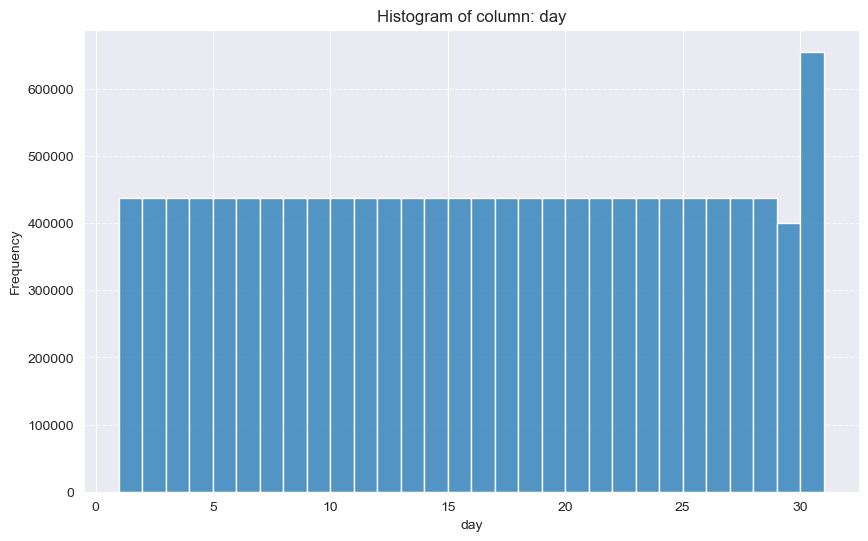

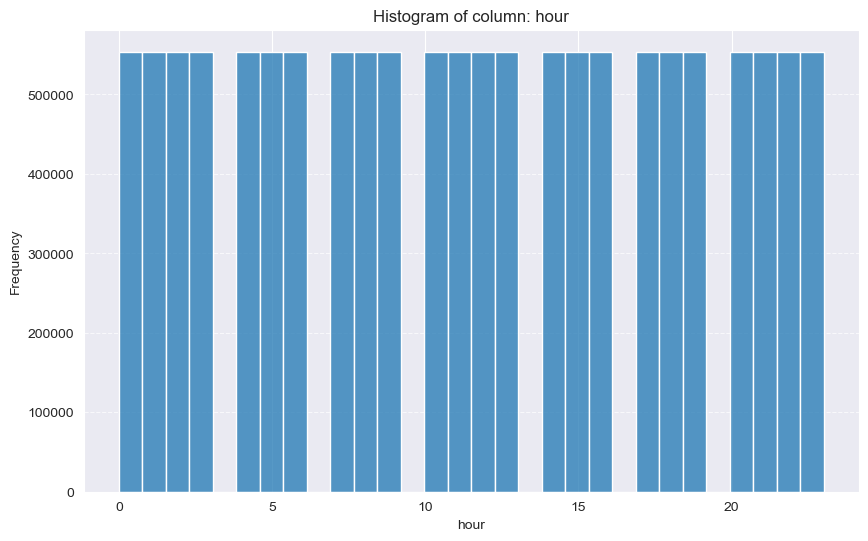

In [87]:
def plotHist(data, col):
    plt.figure(figsize=(10, 6))
    sns.histplot(data[col], bins=30)
    plt.title(f"Histogram of column: {str(col)}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.grid(axis="y", linestyle="--", alpha=0.7)
    plt.show()
    
numerical_columns = list(era5_train.columns)

for col in numerical_columns:
    plotHist(era5_train, col)

In [ ]:
# to do:
# clarify that all mins and secs components of valid_time are 00 so no need to do them
# sns pearson correlation matrix